In [10]:
# data_extraction.py
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Load the dataset
data_path = './dataset_phishing.csv'
dataset = pd.read_csv(data_path)

# Step 1: Drop irrelevant columns (e.g., 'url')
if 'url' in dataset.columns:
    dataset = dataset.drop(columns=['url'])

# Step 2: Remove duplicates
dataset = dataset.drop_duplicates()

# Step 3: Encode the target variable ('status') as binary
if 'status' in dataset.columns:
    label_encoder = LabelEncoder()
    dataset['status'] = label_encoder.fit_transform(dataset['status'])

# Step 4: Handle missing values (drop columns with >50% missing)
missing_threshold = 0.5
missing_percentage = dataset.isnull().mean()
columns_to_drop = missing_percentage[missing_percentage > missing_threshold].index
dataset = dataset.drop(columns=columns_to_drop)

# Fill remaining missing values with the median of each column
dataset = dataset.fillna(dataset.median())

# Step 5: Standardize numerical features
numerical_cols = dataset.select_dtypes(include=['float64', 'int64']).columns
dataset[numerical_cols] = StandardScaler().fit_transform(dataset[numerical_cols])

# Step 6: Select Top 30 Features Based on Correlation with Target
correlation_with_target = dataset.corr()['status'].abs().sort_values(ascending=False)
top_30_features = correlation_with_target.index[1:31]  # Exclude 'status' itself

# Reduce dataset to top 30 features
dataset_top_30 = dataset[top_30_features.to_list() + ['status']]

# Step 7: Save the cleaned dataset with top 30 features
cleaned_data_top_30_path = './cleaned_dataset.csv'
dataset_top_30.to_csv(cleaned_data_top_30_path, index=False)

print(f"Cleaned dataset with top 30 features saved to: {cleaned_data_top_30_path}")


Cleaned dataset with top 30 features saved to: ./cleaned_dataset.csv


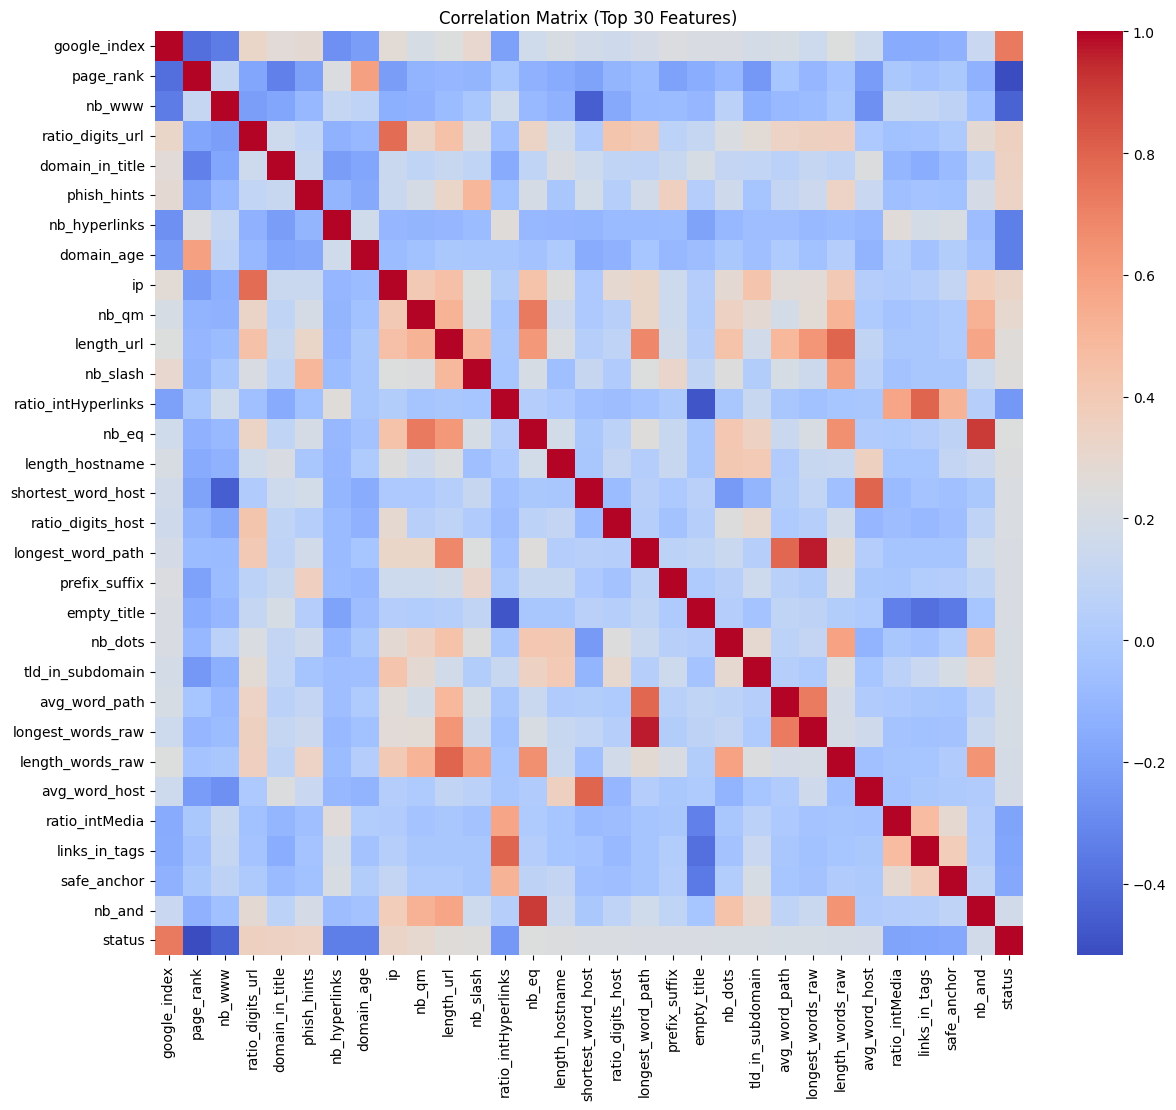

In [11]:
from matplotlib import pyplot as plt
import seaborn as sns


correlation_matrix_top_30 = dataset_top_30.corr()
plt.figure(figsize=(14, 12))
sns.heatmap(correlation_matrix_top_30, annot=False, cmap='coolwarm', cbar=True)
plt.title('Correlation Matrix (Top 30 Features)')
plt.show()

C:\Users\sifen\AppData\Local\Temp\ipykernel_15716\1398856097.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='status', data=dataset, palette='viridis')


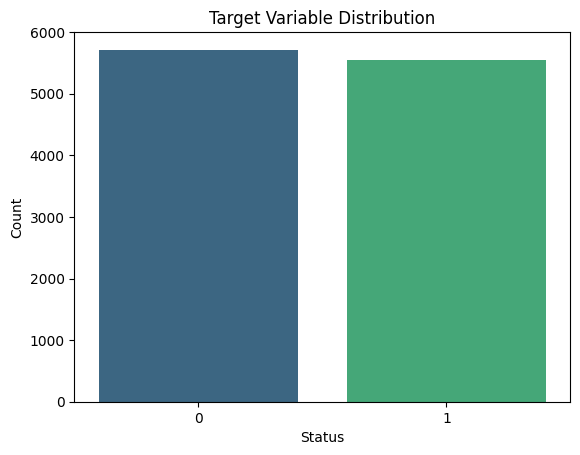

In [12]:
sns.countplot(x='status', data=dataset, palette='viridis')
plt.title('Target Variable Distribution')
plt.xlabel('Status')
plt.ylabel('Count')
plt.show()


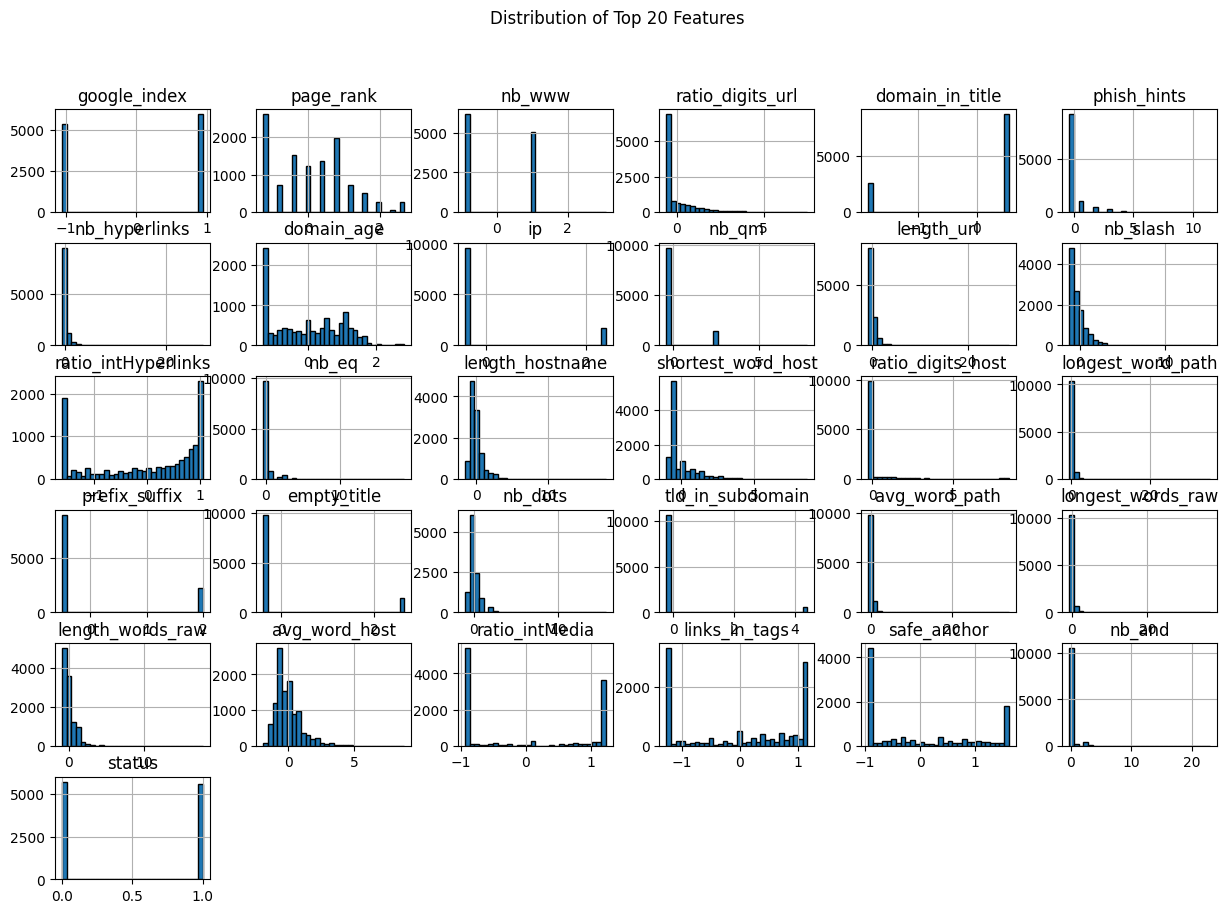

In [13]:
dataset_top_30.hist(figsize=(15, 10), bins=30, edgecolor='k')
plt.suptitle('Distribution of Top 20 Features')
plt.show()
